In [1]:
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

import os
import cv2
from sympy import Point, Ellipse
import numpy as np
import math

folder = '/Users/Zack/0_bing/images_1km_2019-10-13/'
folder_out = '/Users/Zack/Desktop/temp/'
images = os.listdir(folder)

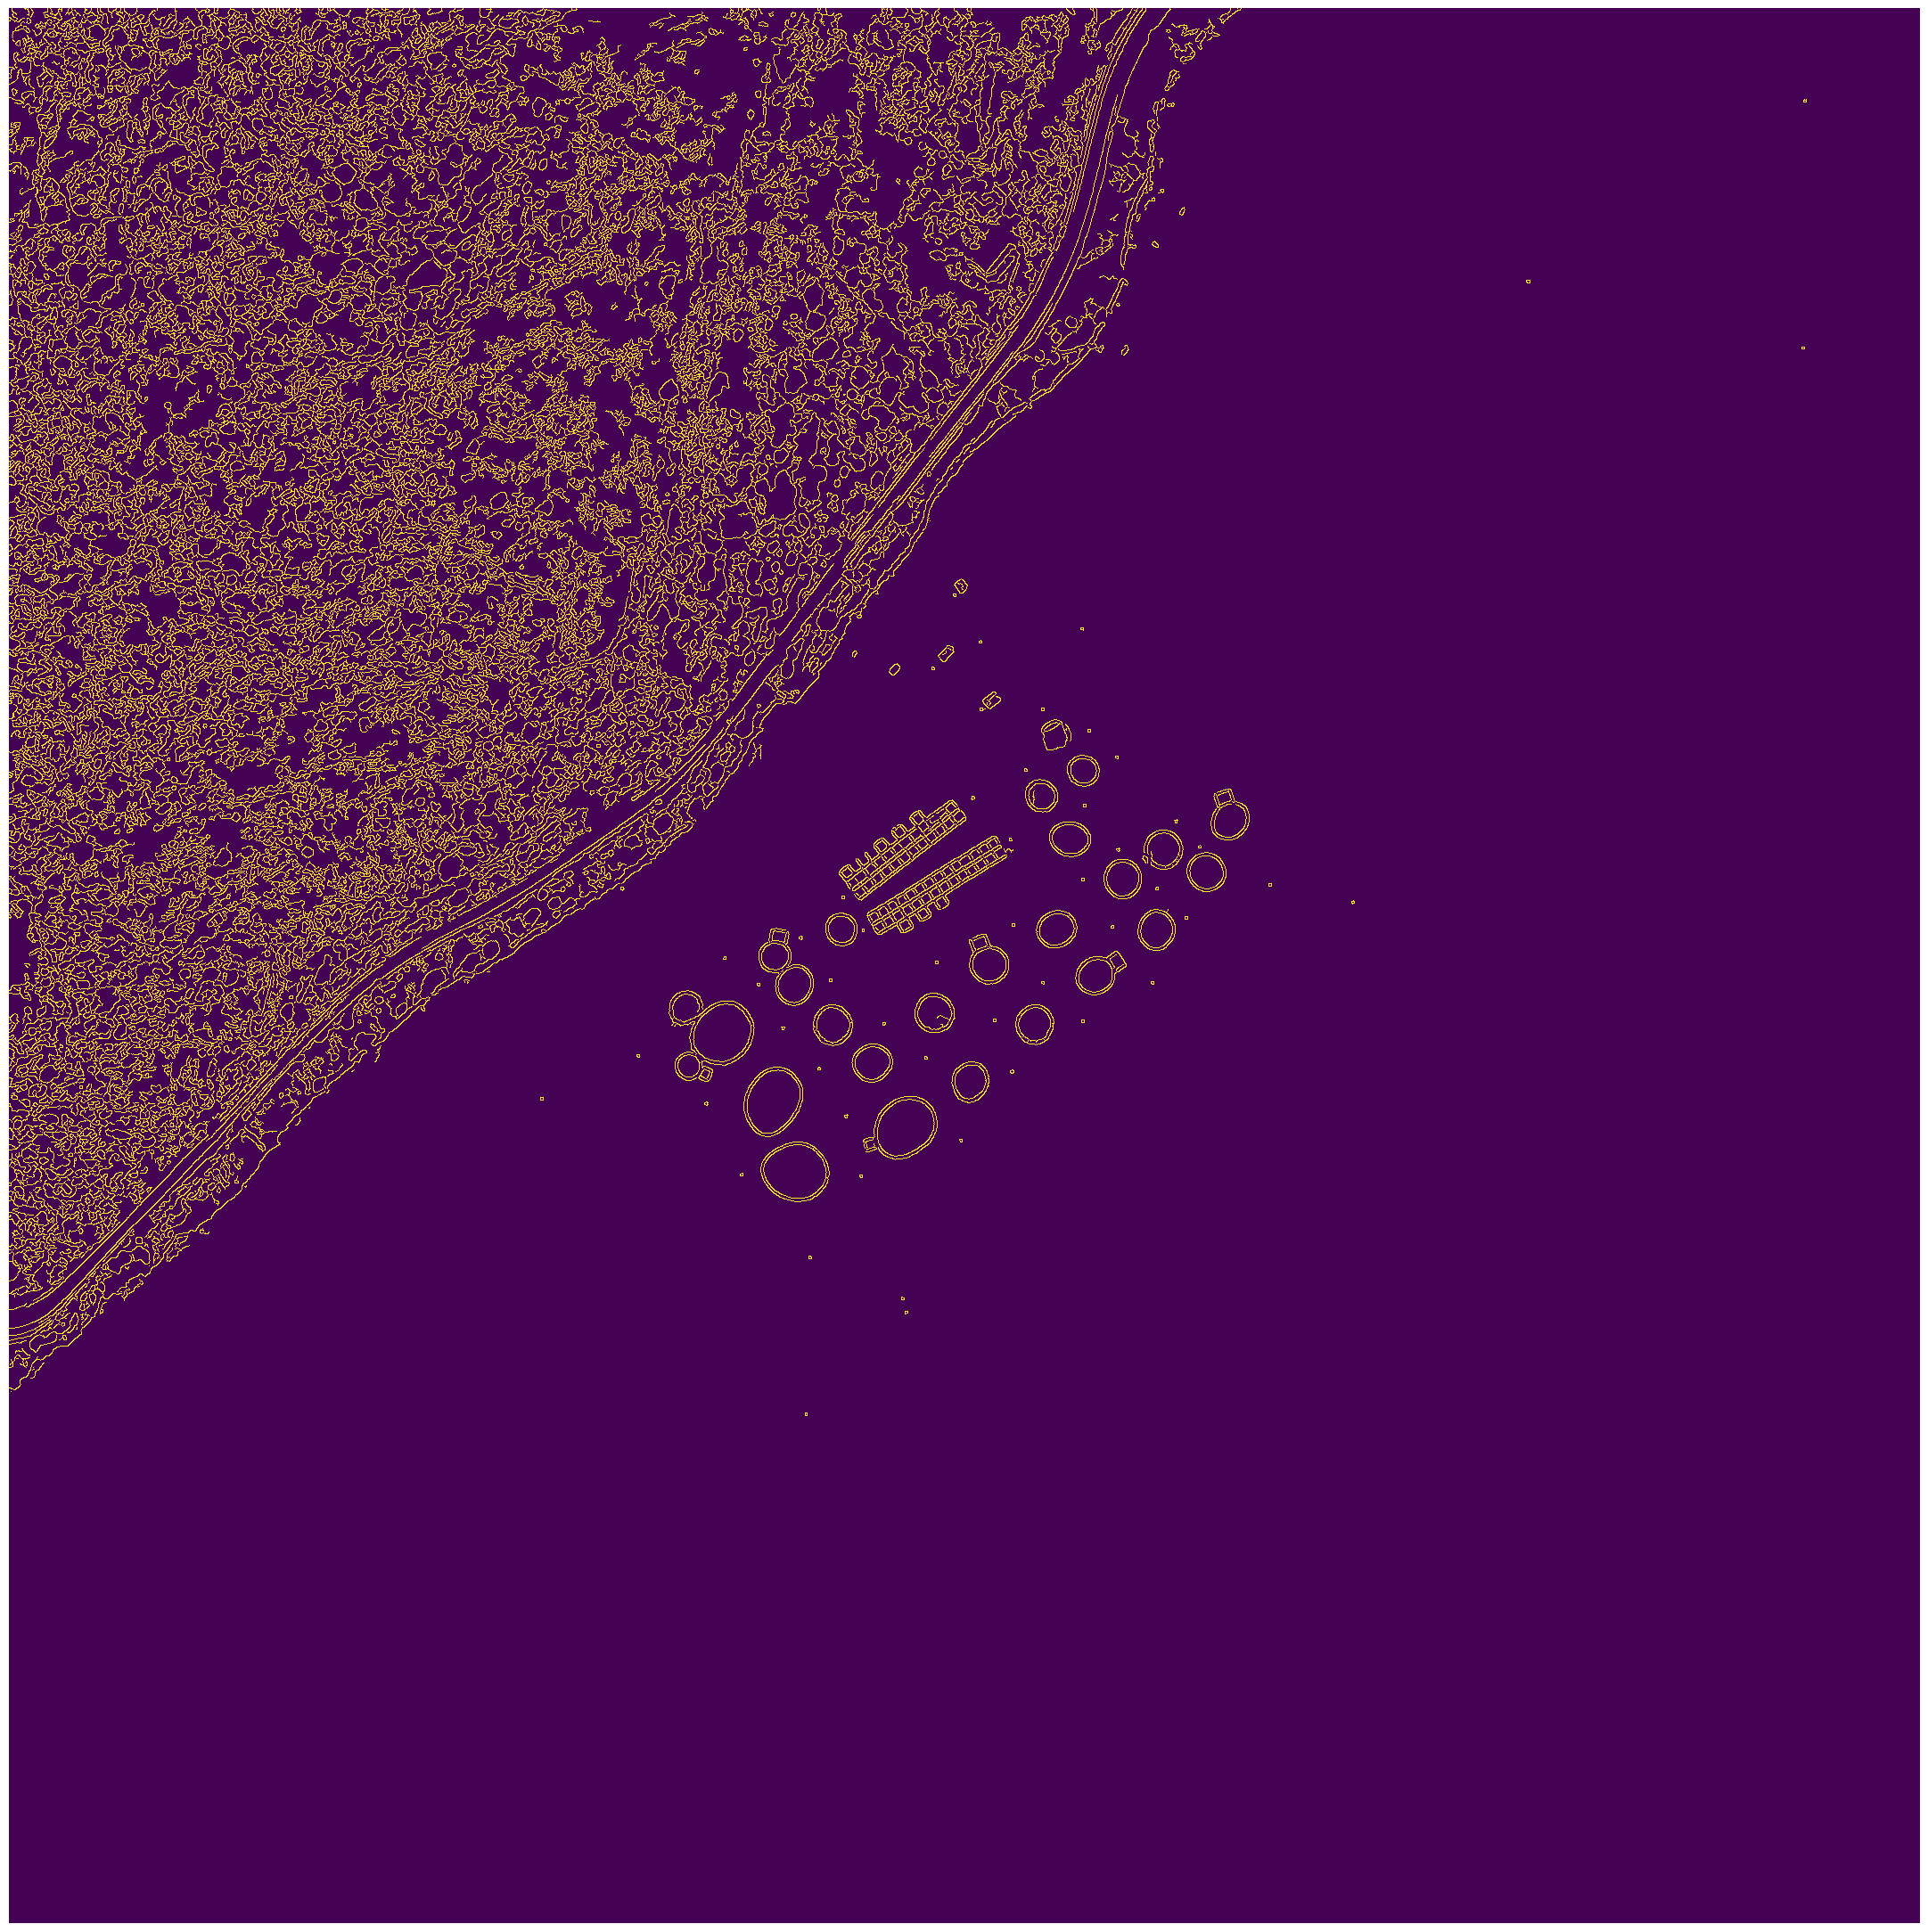

In [2]:
x1 = folder + images[0]
im = cv2.imread(x1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.GaussianBlur(im, (5, 5), 0)
#_, im = cv2.threshold(im, 30, 255, 0)
im = cv2.Canny(im,10, 100)
#im = cv2.dilate(im, None, iterations=1)
#im = cv2.erode(im, None, iterations=1)

margin = 0
dpi = 96
fig = plt.figure(figsize=(im.shape[1]/dpi, im.shape[0]/dpi), dpi=dpi)
ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
ax.axis('off')
ax.imshow(im)
#plt.savefig(folder_out + images)
#plt.show()

In [48]:
    
contours_area = []
# calculate area and filter into new array
for con in contours:
    area = cv2.contourArea(con)
    if 1000 < area < 10000:
        contours_area.append(con)
             
contours_cirles = []
# check if contour is of circular shape
for con in contours_area:
    perimeter = cv2.arcLength(con, True)
    area = cv2.contourArea(con)
    if perimeter == 0:
        break
    circularity = 4*math.pi*(area/(perimeter*perimeter))
    print(circularity)
    if 0.7 < circularity < 1.2:
        contours_cirles.append(con)

In [91]:
    margin = 0
    dpi = 96
    #fig = plt.figure(figsize=(im.shape[1]/dpi, im.shape[0]/dpi), dpi=dpi)
    #ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    #ax.axis('off')
    #ax.imshow(contours_area)
    #plt.savefig(folder_out + images)
    #plt.show()

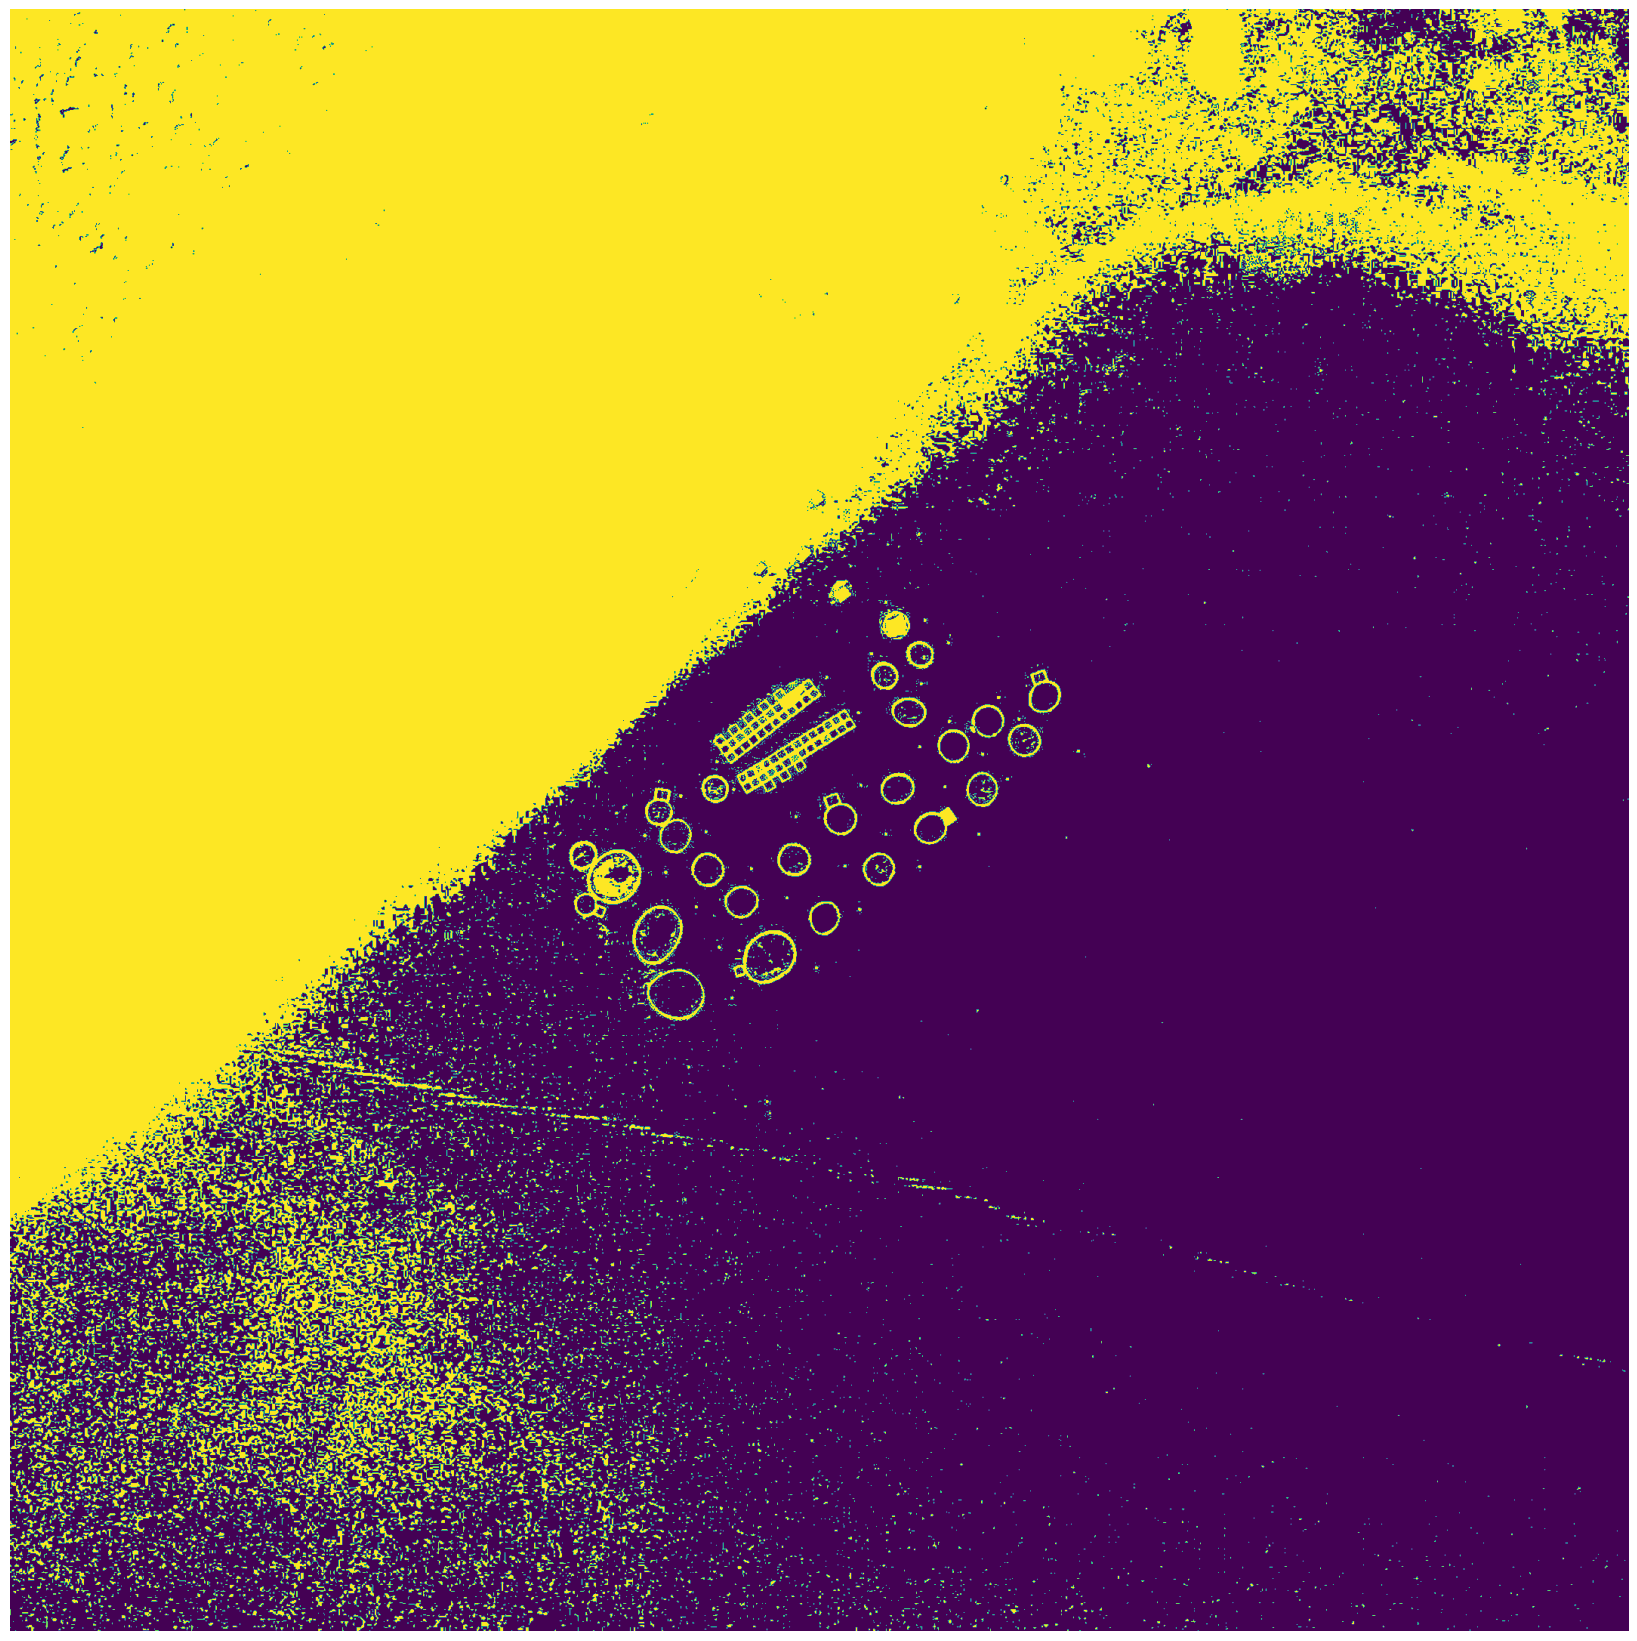

In [89]:
im = cv2.imread(x1)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray,30,35,0)

margin = 0
dpi = 96
fig = plt.figure(figsize=(im.shape[1]/dpi, im.shape[0]/dpi), dpi=dpi)
plt.imshow(thresh)
plt.axis('off')
#plt.savefig(folder_out + images)
plt.show()

In [70]:
contours1

array([[ 803, 2098]], dtype=int32)

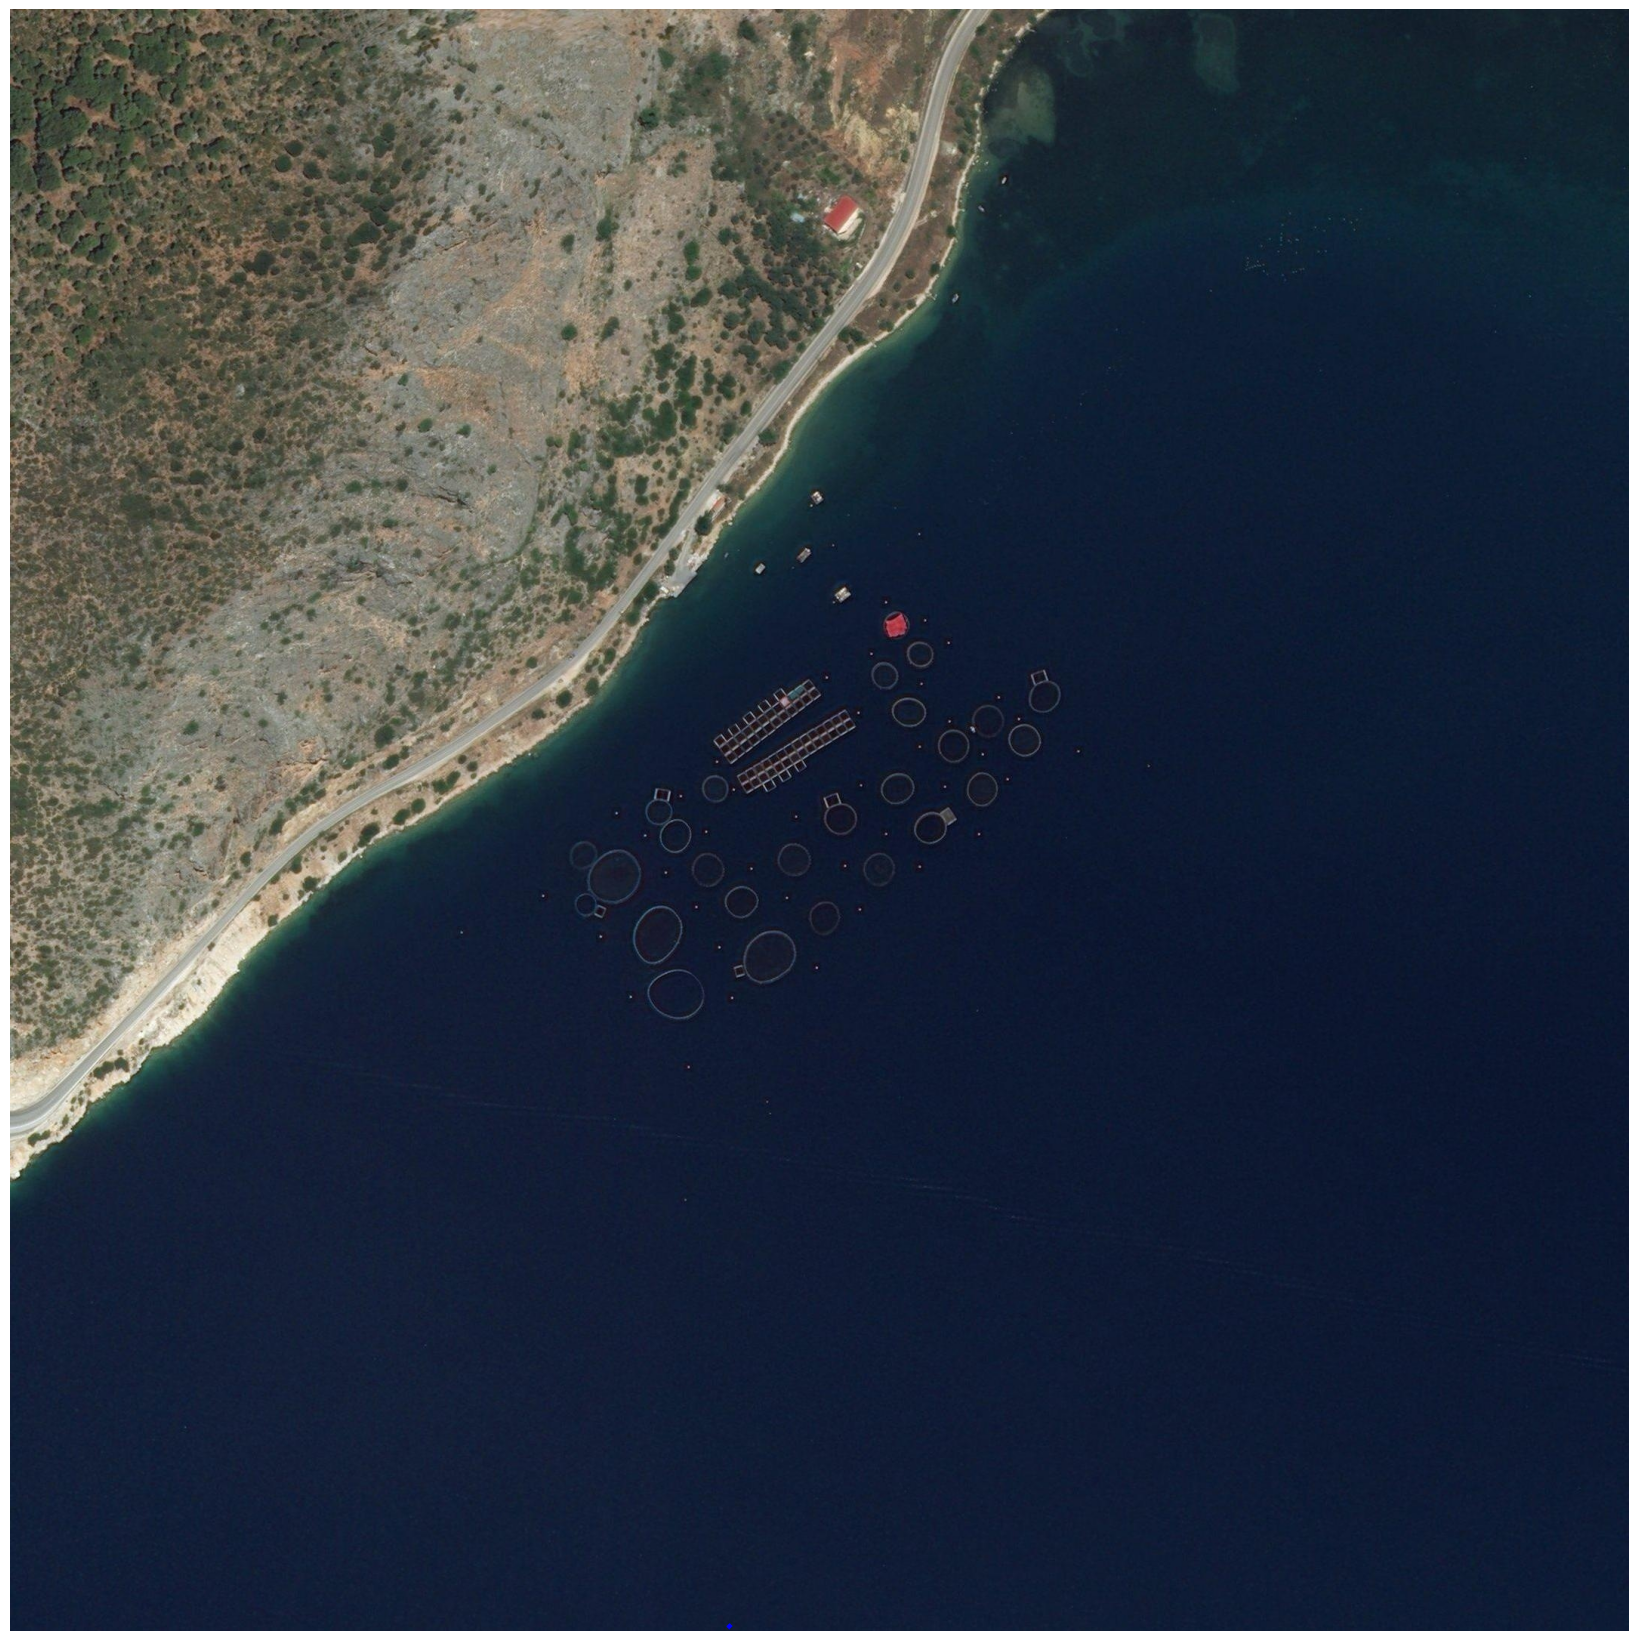

In [74]:
## Step #1 - Detect contours using both methods on the same image
_, contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

### Step #2 - Reshape to 2D matrices
contours1 = contours1[0].reshape(-1,2)

### Step #3 - Draw the points as individual circles in the image
img1 = im.copy()

for (x, y) in contours1:
    cv2.circle(img1, (x, y), 1, (255, 0, 0), 3)

margin = 0
dpi = 96
fig = plt.figure(figsize=(im.shape[1]/dpi, im.shape[0]/dpi), dpi=dpi)
plt.imshow(img1[:,:,::-1])
plt.axis('off')
#plt.savefig(folder_out + images)
plt.show()

In [ ]:

#x1 = '/Users/Zack/Desktop/qQN4Z.jpg'
image = cv2.imread(x1,0)
image1 = cv2.imread(x1,1)
x,y=image.shape
image.shape

In [ ]:
median = cv2.GaussianBlur(image,(9,9),0)
median1 = cv2.GaussianBlur(image,(21,21),0)
a=median1-median
c=255-a
ret,thresh1 = cv2.threshold(c,12,255,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
cv2.imwrite('/Users/Zack/Desktop/temp/test.jpg',opening)

ret,contours,hierarchy = cv2.findContours(opening,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
c=np.size(contours[:])
Blank_window=np.zeros([x,y,3])
Blank_window=np.uint8(Blank_window)

for u in range(0,c-1):
    if (np.size(contours[u])>200):
        ellipse = cv2.fitEllipse(contours[u])
        (center,axes,orientation) =ellipse
        majoraxis_length = max(axes)
        minoraxis_length = min(axes)
        eccentricity=(np.sqrt(1-(minoraxis_length/majoraxis_length)**2))
        if (eccentricity<0.8):
             cv2.drawContours(image1, contours, u, (0,0,255), 3)   
                
cv2.imwrite('/Users/Zack/Desktop/temp/1.jpg',image1)

In [ ]:
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

folder = '/Users/Zack/0_bing/images_1km_2019-10-13/'
folder_out = '/Users/Zack/Desktop/temp/'
images = os.listdir(folder)
print("total number of images:", len(images))

for images in images[0:1]:
    img = folder + images
    im = cv.imread(img) #open image
    #im = cv.cvtColor(im, cv.COLOR_BGR2GRAY) #grayscale
    im = cv.blur(im,(5,5)) #blur
    im = cv.Canny(im,0,50) #canny

    params = cv.SimpleBlobDetector_Params()
    #params.minThreshold = 0
    #params.maxThreshold = 2000
    
    params.filterByArea = True
    params.minArea = 100
    params.maxArea = 1000

    params.filterByCircularity = True
    params.minCircularity = 0

    params.filterByConvexity = True
    params.minConvexity = 0

    params.filterByInertia = True
    params.maxInertiaRatio = 1
    params.minInertiaRatio = 0

    detector = cv.SimpleBlobDetector_create(params)      
    keypoints = detector.detect(im)
    im_with_keypoints = cv.drawKeypoints(im, keypoints, np.array([]), 
                                          (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    margin = 0
    dpi = 96
    fig = plt.figure(figsize=(im.shape[1]/dpi, im.shape[0]/dpi), dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.axis('off')
    ax.imshow(cv.cvtColor(im_with_keypoints, cv.COLOR_BGR2RGB))
    plt.savefig(folder_out + images)
    #plt.show()